# 📈 Apple ve Samsung Hisse Analizi
Bu projede Apple ve Samsung hisseleri analiz edilmiştir. Fiyat verileri çekilmiş, grafiklerle görselleştirilmiş ve Apple hissesi için basit bir doğrusal regresyon modeli ile fiyat tahmini yapılmıştır.

#Analiz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_datareader import data # Removed pandas_datareader
from datetime import datetime
import yfinance as yf # Import yfinance

In [ ]:
df = pd.read_csv("Apple Dataset.csv", parse_dates=["Date"])
df = pd.read_csv("Samsung Dataset.csv", parse_dates=["Date"])

In [ ]:
# Show missing data
print("Show missing data:")
print(df.isnull().sum())

Show missing data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(list(df.columns))


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
df = df.sort_values("Date")

In [ ]:
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [ ]:
company_list = ['AAPL', 'SMSN.IL'] # Apple and Samsung ticker symbols

In [ ]:
# Use yfinance to download the data for Apple and Samsung
AAPL = yf.download('AAPL', start=year_ago, end=today, auto_adjust=False)
samsung_data = yf.download('005930.KS', start=year_ago, end=today, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# İstatistiksel Analiz


In [ ]:
AAPL.describe()
samsung_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
count,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02
mean,59440.067492,59938.174274,60734.854772,59327.800830,59991.701245,2.076407e+07
std,7149.457302,7469.579639,7574.548177,7442.166949,7630.411578,8.966105e+06
min,49269.335938,49900.000000,51400.000000,49900.000000,50200.000000,5.848342e+06
25%,54700.000000,54900.000000,55500.000000,54400.000000,55000.000000,1.442026e+07
50%,57168.226562,57400.000000,58100.000000,56800.000000,57400.000000,1.862730e+07
75%,61037.363281,61400.000000,61900.000000,60500.000000,61300.000000,2.504514e+07
max,82377.421875,83900.000000,86100.000000,83100.000000,86000.000000,5.460879e+07


# Veri Temizleme

In [ ]:
print("Eksik veriler (AAPL):")
print(AAPL.isnull().sum())
print("\nEksik veriler (Samsung):")
print(samsung_data.isnull().sum())


Eksik veriler (AAPL):
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

Eksik veriler (Samsung):
Price      Ticker   
Adj Close  005930.KS    0
Close      005930.KS    0
High       005930.KS    0
Low        005930.KS    0
Open       005930.KS    0
Volume     005930.KS    0
dtype: int64


In [ ]:
AAPL.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-07-24,217.522720,218.539993,224.800003,217.130005,224.000000,61777600
2024-07-25,216.477615,217.490005,220.850006,214.619995,218.929993,51391200
2024-07-26,216.945435,217.960007,219.490005,216.009995,218.699997,41601300
2024-07-29,217.224121,218.240005,219.300003,215.750000,216.960007,36311800
2024-07-30,217.781509,218.800003,220.330002,216.119995,219.190002,41643800


In [ ]:
# Display the head of the Samsung data DataFrame
samsung_data.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2024-07-24,80511.890625,82000.0,83300.0,81900.0,82900.0,16939083
2024-07-25,78940.921875,80400.0,81000.0,80100.0,80400.0,20323811
2024-07-26,79431.851562,80900.0,81300.0,80400.0,80700.0,14508334
2024-07-29,79726.414062,81200.0,82000.0,81100.0,81600.0,12797136
2024-07-30,79530.039062,81000.0,81000.0,80000.0,80400.0,13169636


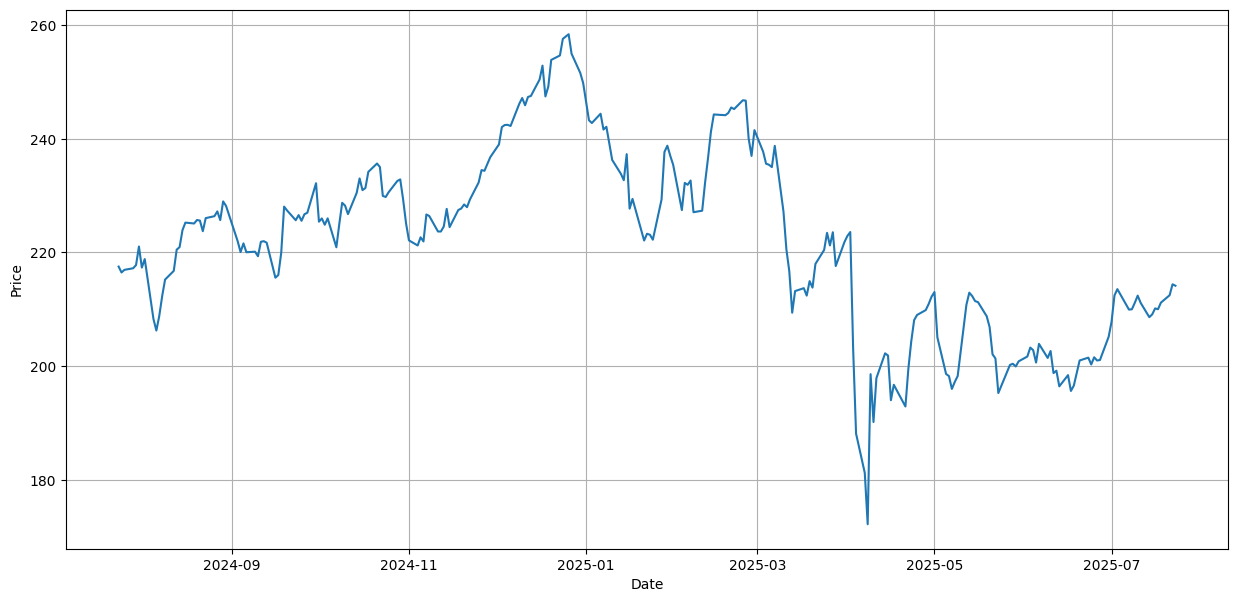

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(AAPL['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


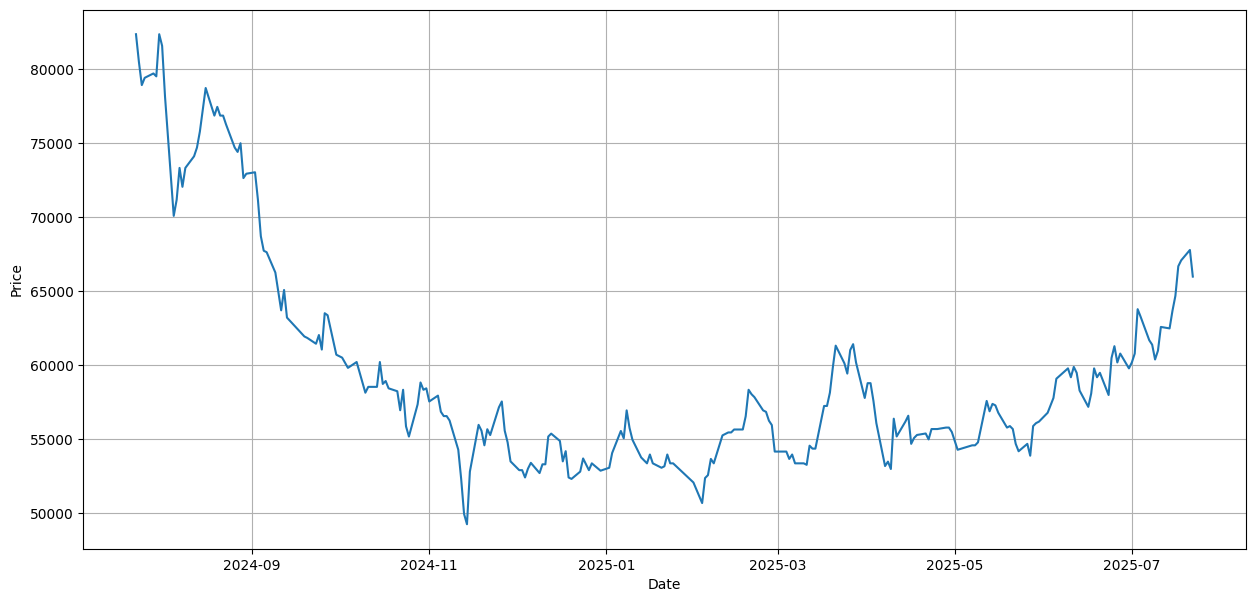

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(samsung_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<Axes: xlabel='Date'>

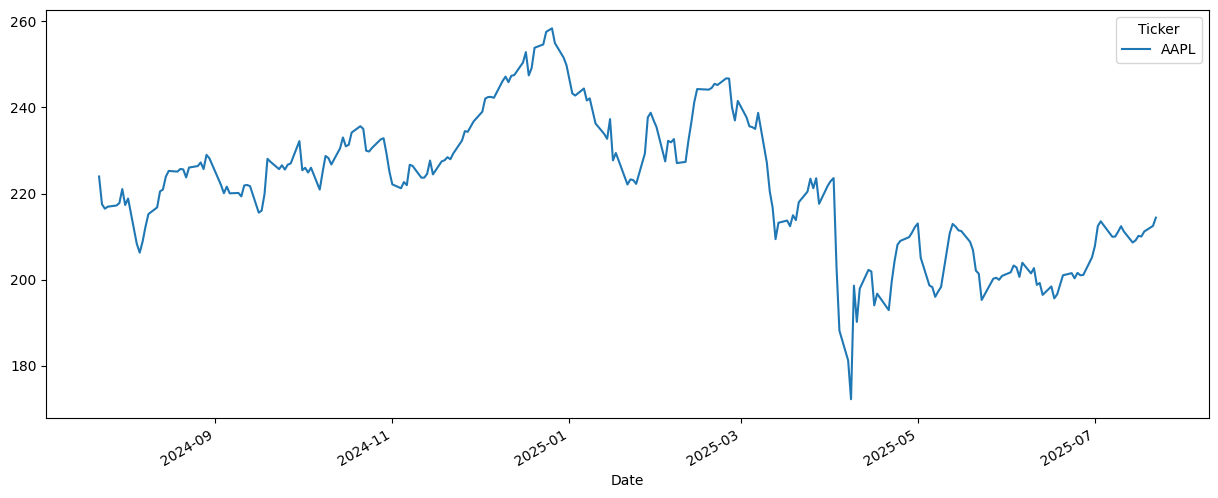

In [ ]:
AAPL['Adj Close'].plot(legend=True, figsize=(15, 6))

<Axes: xlabel='Date'>

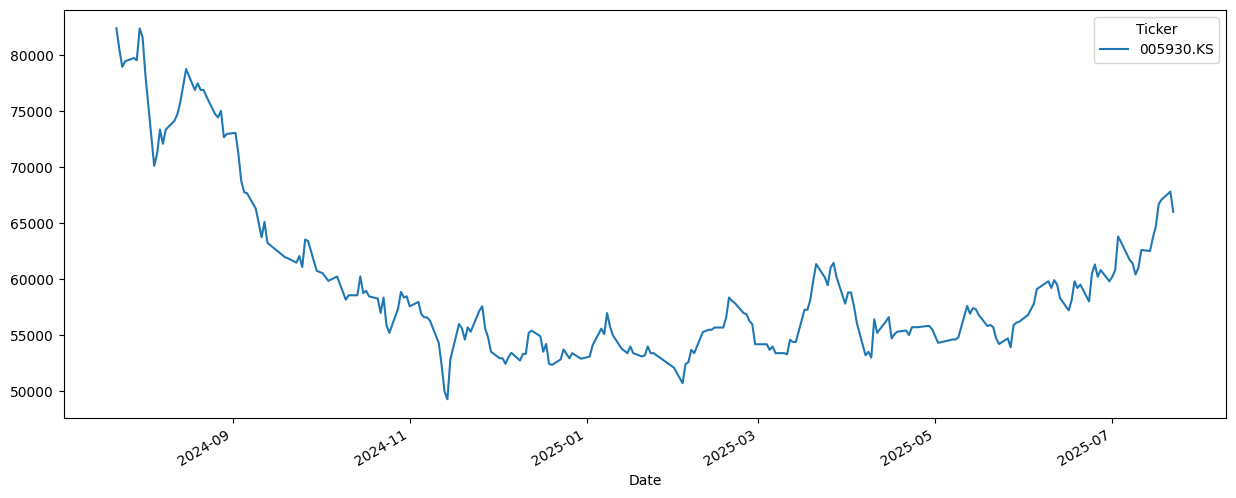

In [ ]:
samsung_data['Adj Close'].plot(legend=True, figsize=(15, 6))

#Hareketli Ortalama

In [ ]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA_{}".format(ma)
    AAPL[ma_str] = AAPL['Adj Close'].rolling(ma).mean()
    samsung_data[ma_str] = samsung_data['Adj Close'].rolling(ma).mean()

In [ ]:
AAPL.head(5)

Price,Adj Close,Close,High,Low,Open,Volume,MA_10,MA_20,MA_30
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2024-07-23,223.962601,225.009995,226.940002,222.679993,224.369995,39960300,NaN,NaN,NaN
2024-07-24,217.522720,218.539993,224.800003,217.130005,224.000000,61777600,NaN,NaN,NaN
2024-07-25,216.477615,217.490005,220.850006,214.619995,218.929993,51391200,NaN,NaN,NaN
2024-07-26,216.945435,217.960007,219.490005,216.009995,218.699997,41601300,NaN,NaN,NaN
2024-07-29,217.224121,218.240005,219.300003,215.750000,216.960007,36311800,NaN,NaN,NaN


In [ ]:
samsung_data.head(5)

Price,Adj Close,Close,High,Low,Open,Volume,MA_10,MA_20,MA_30
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,,,
Date,,,,,,,,,
2024-07-23,82377.414062,83900.0,84700.0,83400.0,84200.0,15766389,NaN,NaN,NaN
2024-07-24,80511.898438,82000.0,83300.0,81900.0,82900.0,16939083,NaN,NaN,NaN
2024-07-25,78940.929688,80400.0,81000.0,80100.0,80400.0,20323811,NaN,NaN,NaN
2024-07-26,79431.859375,80900.0,81300.0,80400.0,80700.0,14508334,NaN,NaN,NaN
2024-07-29,79726.414062,81200.0,82000.0,81100.0,81600.0,12797136,NaN,NaN,NaN


In [ ]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA_10'])
    plt.plot(company['MA_20'])
    plt.plot(company['MA_30'])

    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA_10', 'MA_20', 'MA_30'))
    plt.grid()
    plt.show()

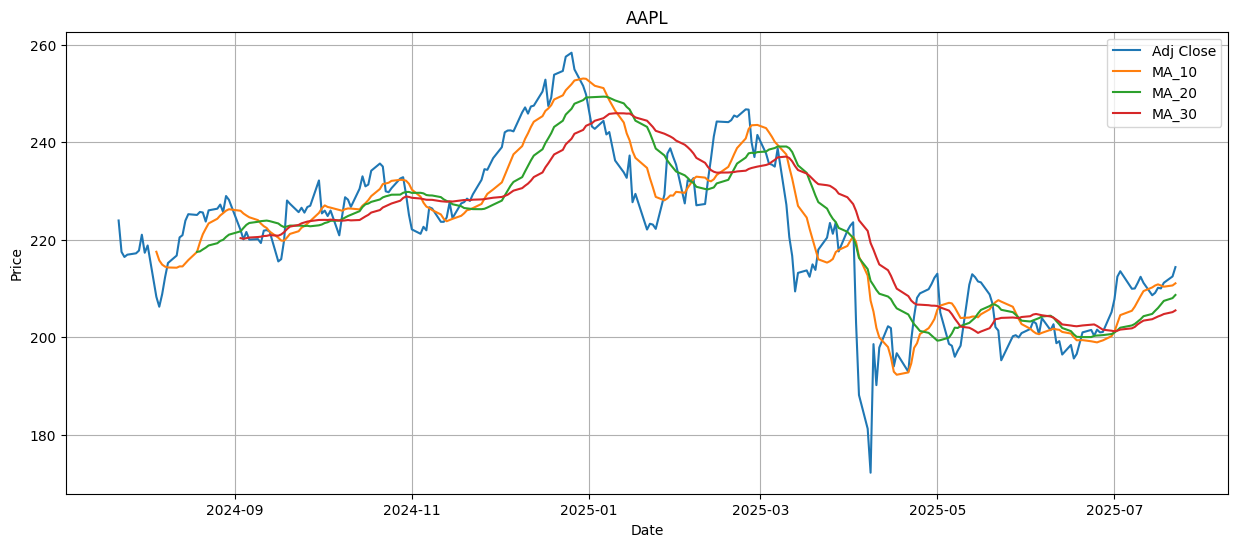

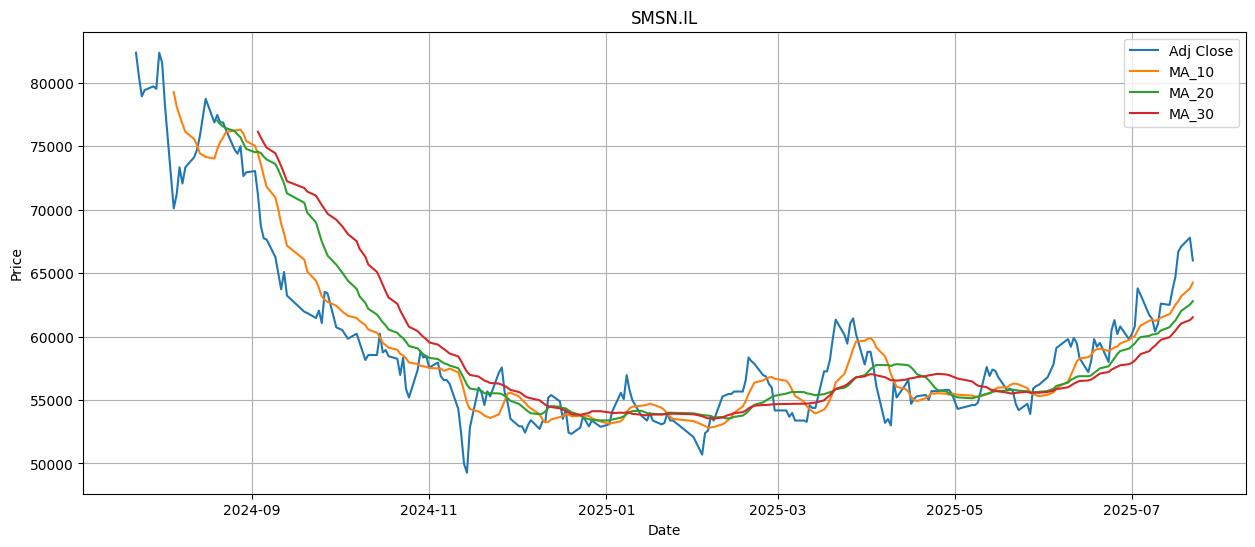

In [ ]:
data_list = [AAPL, samsung_data]

for i in range(len(data_list)):
    plot_graphic(data_list[i], company_list[i])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


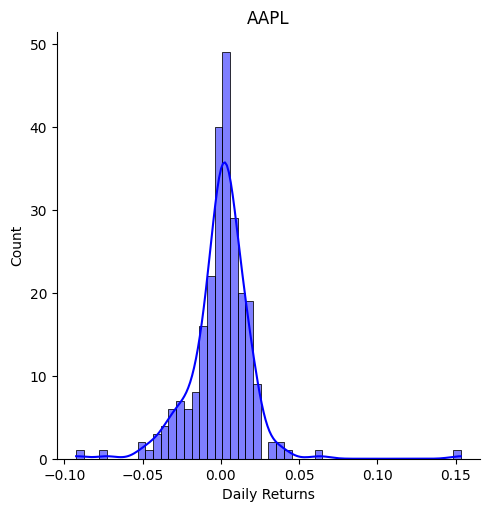

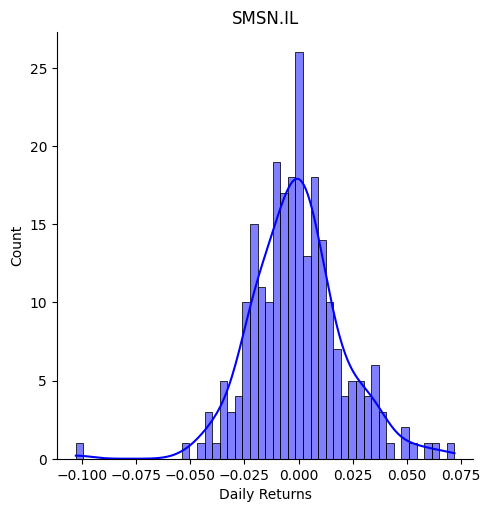

AAPL       0.000026
SMSN.IL   -0.000667
dtype: float64
             AAPL   SMSN.IL
AAPL     0.000401  0.000054
SMSN.IL  0.000054  0.000456
Potansiyel zarar var. SAT tavsiyesi.


In [ ]:
import pandas as pd # Ensure pandas is imported
import yfinance as yf # Import yfinance
from datetime import datetime # Import datetime
import seaborn as sns # Ensure seaborn is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Define today and year_ago
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

# Define company_list
company_list = ['AAPL', 'SMSN.IL'] # Apple and Samsung ticker symbols

# Use yfinance to download the data for Apple and Samsung
AAPL = yf.download('AAPL', start=year_ago, end=today, auto_adjust=False)
samsung_data = yf.download('005930.KS', start=year_ago, end=today, auto_adjust=False)

# Define data_list
data_list = [AAPL, samsung_data]

# Calculate returns and draw distribution
for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

# Create dataframe with stock returns
stock_returns = pd.DataFrame({company_list[i]: data_list[i]['Daily Returns'] for i in range(len(data_list))})
stock_returns.head()

# Calculate mean income, covariation, count, and expected return
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation
count = len(stock_returns.columns)
expected_return = stock_returns.mean().mean() # Calculate expected return

# Print mean income and covariation
print(mean_income, cov_returns, sep='\n')

# Print recommendation based on expected return
if expected_return > 0:
    print("Potansiyel kâr var. AL tavsiyesi.")
else:
    print("Potansiyel zarar var. SAT tavsiyesi.")


#Hisse senedi getirileri arasındaki korelasyon

In [ ]:
# Moved to cell otzH7XddMz6n
# import pandas as pd # Ensure pandas is imported
# import yfinance as yf # Import yfinance
# from datetime import datetime # Import datetime

# # Define today and year_ago
# today = datetime.now()
# year_ago = datetime(today.year-1, today.month, today.day)

# # Define company_list
# company_list = ['AAPL', 'SMSN.IL'] # Apple and Samsung ticker symbols

# # Use yfinance to download the data for Apple and Samsung
# AAPL = yf.download('AAPL', start=year_ago, end=today, auto_adjust=False)
# samsung_data = yf.download('005930.KS', start=year_ago, end=today, auto_adjust=False)


# # Define data_list
# data_list = [AAPL, samsung_data]

# # Create dataframe with stock returns
# stock_returns = pd.DataFrame({company_list[i]: data_list[i]['Daily Returns'] for i in range(len(data_list))})
# stock_returns.head()

# # Calculate mean income, covariation, count, and expected return
# mean_income = stock_returns.mean() # Mean income for each stock
# cov_returns = stock_returns.cov() # Covariation
# count = len(stock_returns.columns)
# expected_return = stock_returns.mean().mean() # Calculate expected return

# # Print mean income and covariation
# print(mean_income, cov_returns, sep='\n')

# # Print recommendation based on expected return
# if expected_return > 0:
#     print("Potansiyel kâr var. AL tavsiyesi.")
# else:
#     print("Potansiyel zarar var. SAT tavsiyesi.")

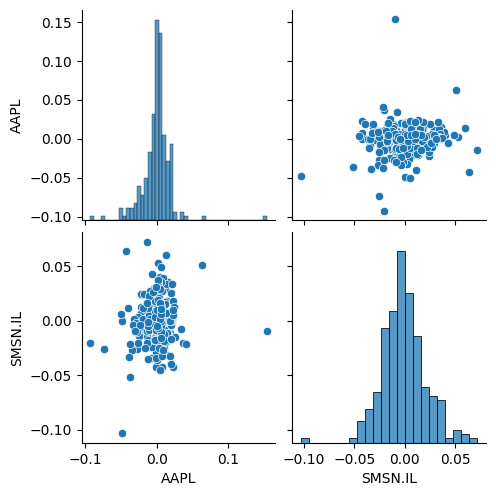

In [ ]:
sns.pairplot(stock_returns.dropna())

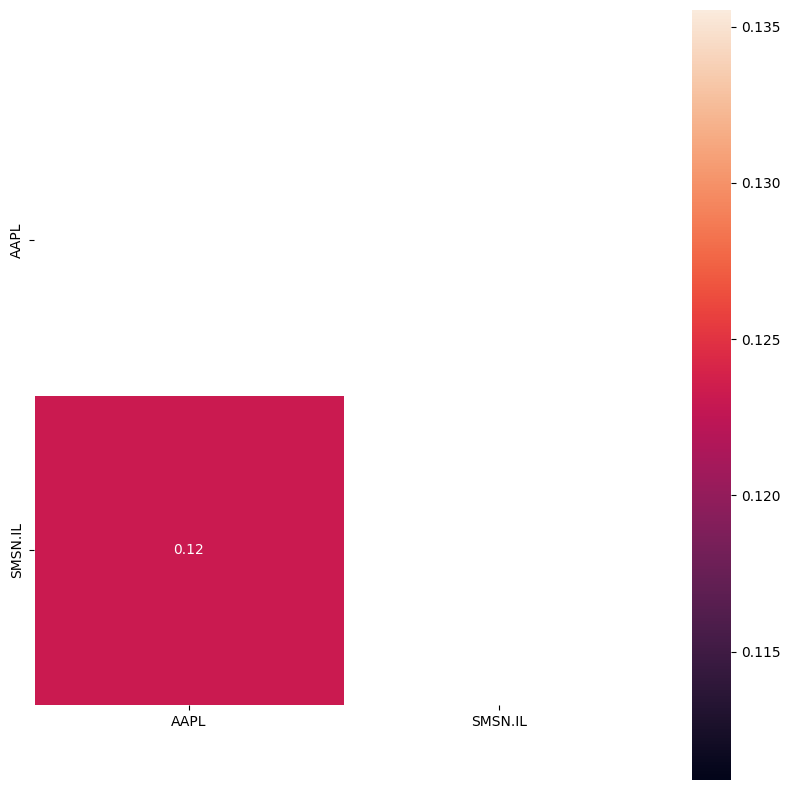

In [ ]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [ ]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

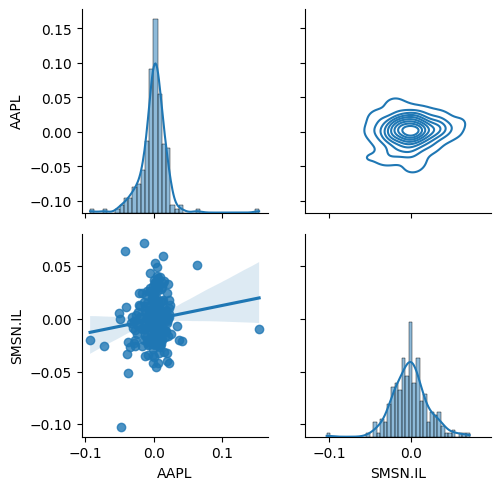

In [ ]:
draw_jointplot(stock_returns)

#Portföy stratejisi

In [ ]:
# Moved to cell sWFydz9hNCxs
# mean_income = stock_returns.mean() # Mean income for each stock
# cov_returns = stock_returns.cov() # Covariation
# count = len(stock_returns.columns)
# expected_return = stock_returns.mean().mean() # Calculate expected return
# print(mean_income, cov_returns, sep='\n')

In [ ]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [ ]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)

In [ ]:
def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [ ]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)


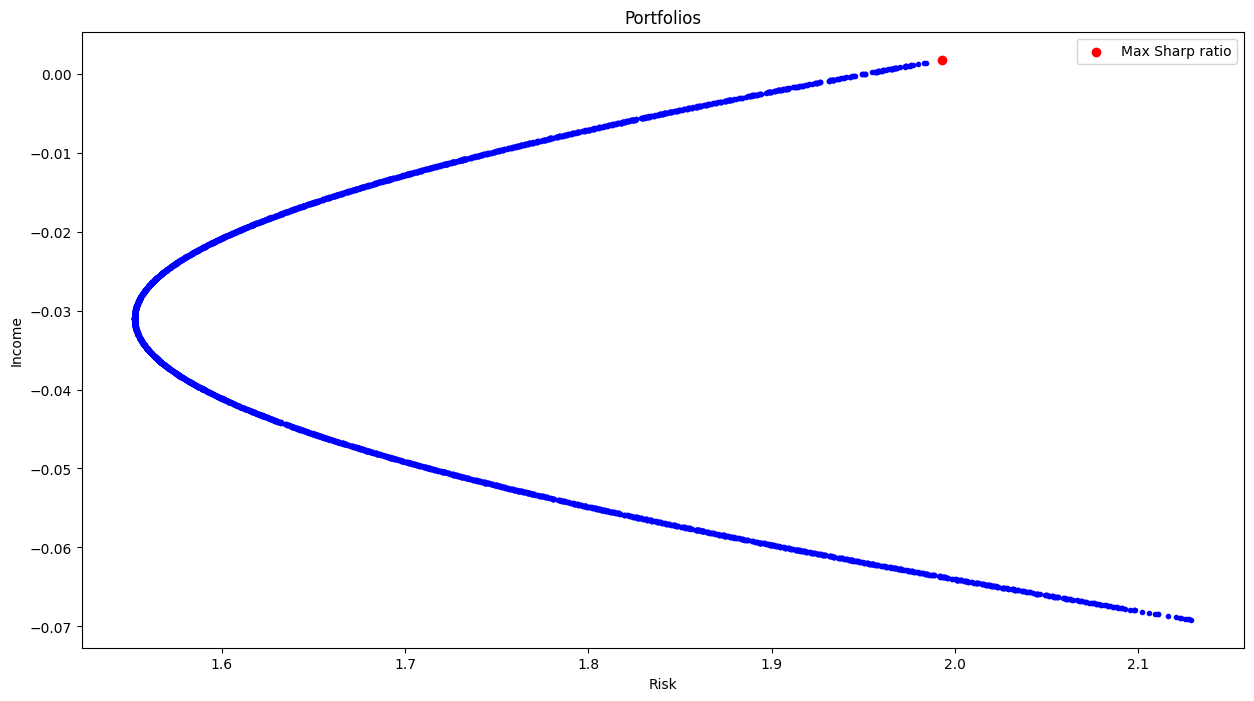

In [ ]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [ ]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

AAPL : 0.9920090911637297
SMSN.IL : 0.007990908836270403



#Monte Carlo yöntemi ile fiyat davranışını tahmin etme

In [ ]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [ ]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [ ]:
AAPL.tail()

Price,Adj Close,Close,High,Low,Open,Volume,MA_10,MA_20,MA_30,Daily Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,,
2025-07-16,210.160004,210.160004,212.399994,208.639999,210.300003,47490500,210.855000,206.010001,204.260334,0.005021
2025-07-17,210.020004,210.020004,211.800003,209.589996,210.570007,48068100,210.613000,206.729001,204.485334,-0.000666
2025-07-18,211.179993,211.179993,211.789993,209.699997,210.869995,48974600,210.375999,207.459000,204.764000,0.005523
2025-07-21,212.479996,212.479996,215.779999,211.630005,212.100006,51377400,210.628999,208.033000,205.159000,0.006156
2025-07-22,214.399994,214.399994,214.949997,212.229996,213.139999,46300400,211.067999,208.678000,205.508333,0.009036


Text(0.5, 1.0, 'Monte Carlo analysis for Apple')

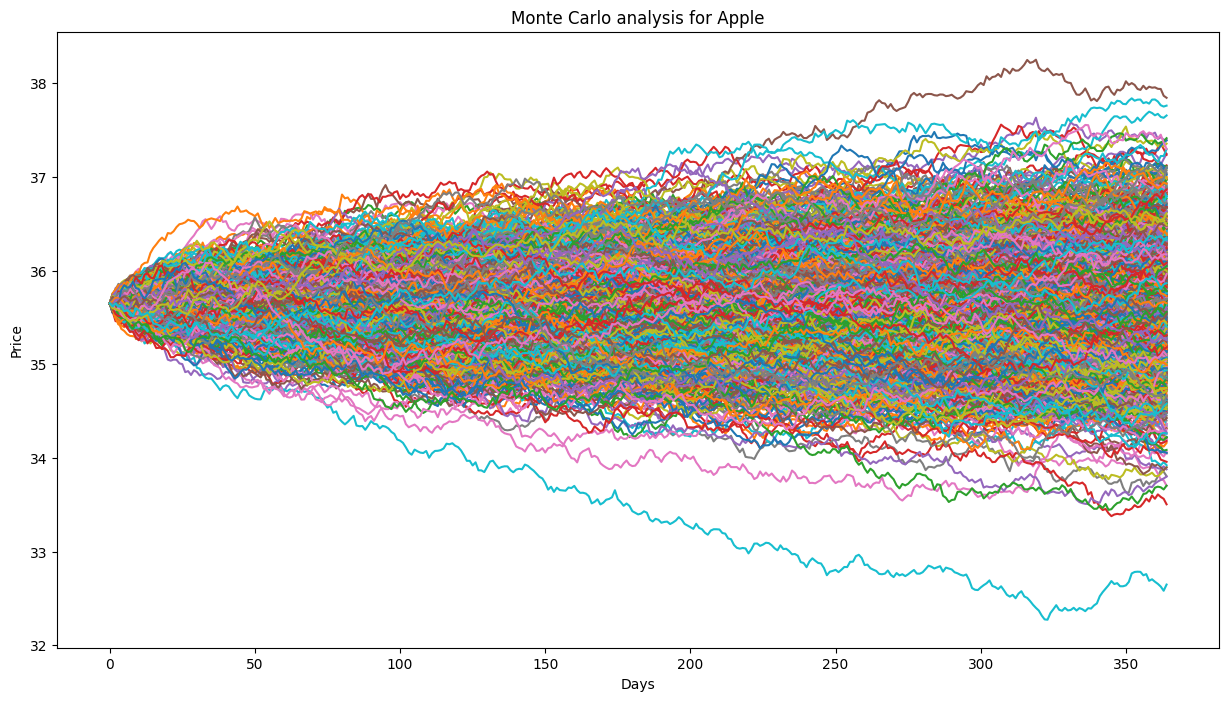

In [ ]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AAPL'], sigma['AAPL'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Apple')

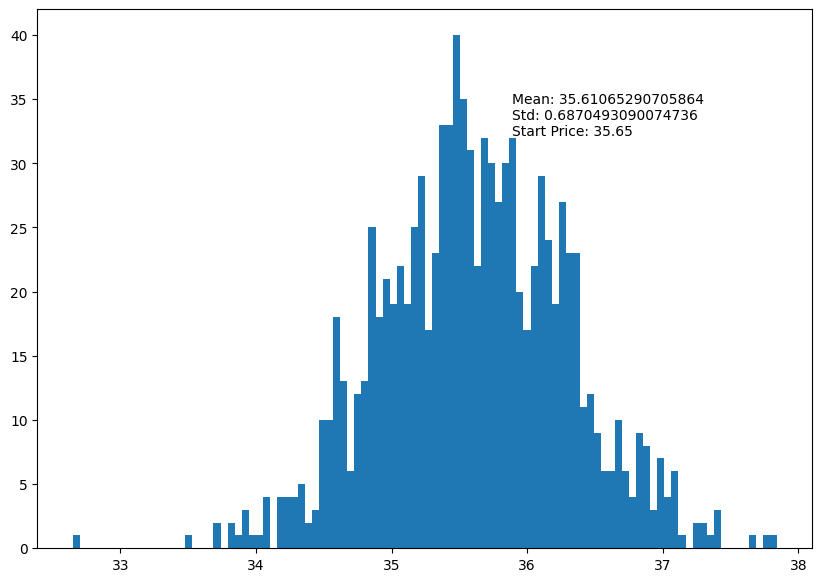

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

In [ ]:
samsung_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,MA_10,MA_20,MA_30,Daily Returns
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,,,,
Date,,,,,,,,,,
2025-07-16,64700.0,64700.0,64700.0,63100.0,63700.0,23042660,62510.0,61270.0,60470.000000,0.015699
2025-07-17,66700.0,66700.0,66800.0,64400.0,65900.0,39448683,62800.0,61645.0,60766.666667,0.030912
2025-07-18,67100.0,67100.0,67800.0,66300.0,67000.0,23951531,63180.0,62025.0,61033.333333,0.005997
2025-07-21,67800.0,67800.0,68800.0,67200.0,67400.0,17723148,63790.0,62515.0,61300.000000,0.010432
2025-07-22,66000.0,66000.0,68500.0,65600.0,68100.0,20829006,64250.0,62790.0,61526.666667,-0.026549


/tmp/ipython-input-182-1727019040.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price[0] = start_price


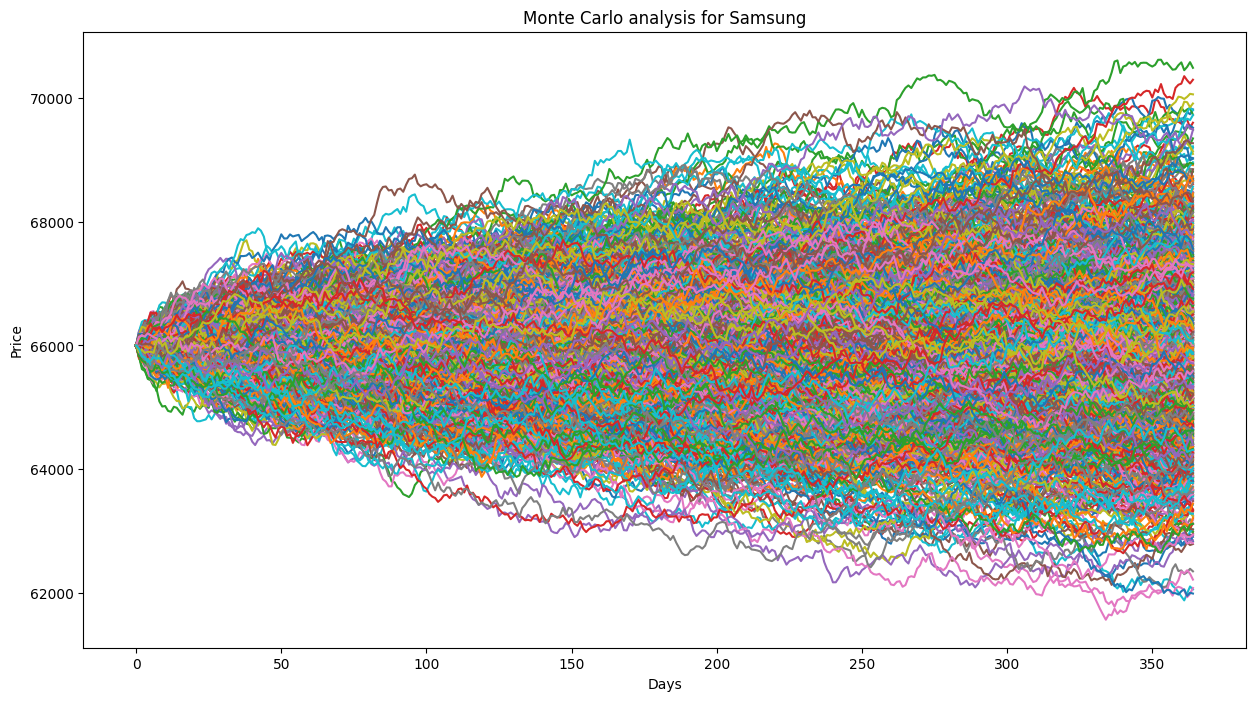

In [ ]:
start_price = samsung_data['Adj Close'].iloc[-1]
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['SMSN.IL'], sigma['SMSN.IL'])
    sim[i] = result[days - 1]
    plt.plot(result)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Samsung')
plt.show()

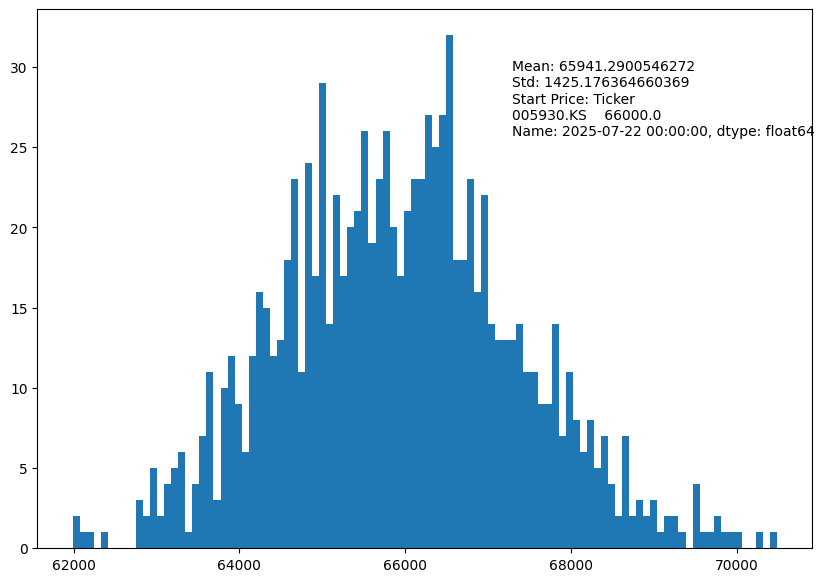

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

 #Volatilite (Standard Sapma)

In [ ]:
# Günlük getiri hesapla
# Use AAPL DataFrame for stock volatility calculation
daily_returns = AAPL['Adj Close'].pct_change().dropna()

# Günlük volatilite
daily_volatility = daily_returns.std()

# Yıllık volatilite (252 işlem günü varsayımıyla)
annual_volatility = daily_volatility * (252**0.5)

print("Yıllık Volatilite:", round(annual_volatility, 4))

Yıllık Volatilite: Ticker
AAPL    0.3186
dtype: float64


#Monte Carlo Simülasyonu ile Risk Tahmini

In [ ]:
import numpy as np

# Başlangıç fiyatı (Apple'ın son ayarlanmış kapanış fiyatını kullan)
# Use AAPL DataFrame for the starting price
start_price = AAPL['Adj Close'].iloc[-1]

# Mu (ortalama günlük getiri) ve Sigma (günlük getiri standart sapması)
# Use the mean and standard deviation calculated from AAPL's daily returns
mu = daily_returns.mean() # Assuming daily_returns is calculated from AAPL
sigma = daily_returns.std() # Assuming daily_returns is calculated from AAPL

# Simülasyon parametreleri
days = 252  # 1 yıl
simulations = 1000
final_prices = []

for sim in range(simulations):
    # Use the monte_carlo function defined earlier
    result = monte_carlo(start_price, days, mu, sigma)
    final_prices.append(result[-1]) # Append the last price of the simulation

# Son fiyatların dağılımı
final_prices = np.array(final_prices)

# %5’lik en kötü senaryo (VaR gibi)
percentile_5 = np.percentile(final_prices, 5)
risk_of_loss = round((start_price - percentile_5) / start_price * 100, 2)

print(f"Monte Carlo %5 en kötü senaryoda zarar oranı: %{risk_of_loss}")

/tmp/ipython-input-149-698133677.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price[0] = start_price
/tmp/ipython-input-149-698133677.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
/tmp/ipython-input-149-698133677.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  drift[x] = mu * dt


Monte Carlo %5 en kötü senaryoda zarar oranı: %Ticker
AAPL    2.65
Name: 2025-07-22 00:00:00, dtype: float64


#Value at Risk (VaR) — Belirli Bir Gün İçinde En Kötü Senaryo

In [ ]:
import numpy as np

confidence_level = 0.95
VaR_95 = np.percentile(daily_returns, (1 - confidence_level) * 100)

print(f"%95 güven seviyesinde günlük VaR: {round(VaR_95 * 100, 2)}%")


%95 güven seviyesinde günlük VaR: -3.17%


 # Sharpe Oranı – Risk Ayarlı Getiri

In [ ]:
risk_free_rate = 0.02  # yıllık risksiz faiz oranı (örn. devlet tahvili)


# Günlük getirilerden yıllık getiriyi hesaplayın
# Yılda 252 işlem günü varsayıldığında
annual_return = daily_returns.mean() * 252

sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

print(f"Sharpe Oranı: {round(sharpe_ratio, 4)}")

#Yorumlama: Sharpe oranı ne kadar yüksekse o kadar iyi.

Sharpe Oranı: Ticker
AAPL   -0.0444
dtype: float64


# Drawdown Analizi – En Büyük Geri Çekilme

In [ ]:
cum_returns = (1 + daily_returns).cumprod()
peak = cum_returns.cummax()
drawdown = (cum_returns - peak) / peak

max_drawdown = drawdown.min()
print("Maksimum Drawdown:", round(max_drawdown * 100, 2), "%")


Maksimum Drawdown: Ticker
AAPL   -33.36
dtype: float64 %


# Senaryo Analizi / Stres Testi

In [ ]:
# Get the most recent closing prices for Apple and Samsung
# Use the 'Close' price since auto_adjust=True was used for AAPL and samsung_data
last_prices = {
    'Apple': AAPL['Close'].iloc[-1].item(), # Use .item() to get the scalar value
    'Samsung': samsung_data['Close'].iloc[-1].item() # Use .item() to get the scalar value
}

# Investment amounts
investments = {'Apple': 6000, 'Samsung': 4000}

# Calculate the initial portfolio value
original_total = sum(investments.values())

# Calculate the number of shares for each stock
shares = {
    'Apple': investments['Apple'] / last_prices['Apple'],
    'Samsung': investments['Samsung'] / last_prices['Samsung']
}

# Stress scenario: percentage decrease
shock = {'Apple': -0.10, 'Samsung': -0.15}

# Calculate the new prices under the stress scenario
new_prices = {
    ticker: last_prices[ticker] * (1 + shock[ticker])
    for ticker in shock.keys() # Iterate over the keys in shock
}

# Calculate the new investment value under the stress scenario
new_values = {
    ticker: shares[ticker] * new_prices[ticker]
    for ticker in shares.keys() # Iterate over the keys in shares
}

# Calculate the new total portfolio value
new_total = sum(new_values.values())

# Calculate the total loss and percentage loss
loss_amount = original_total - new_total
loss_percent = (loss_amount / original_total) * 100

print(f"💥 Stres Testi Sonucu:")
print(f"- Portföy başlangıç değeri: ${original_total:,.2f}")
# Extract scalar values before formatting and printing
print(f"- Portföy yeni değeri:      ${new_total:,.2f}")
print(f"- Toplam zarar:             ${loss_amount:,.2f}")
print(f"- Yüzde kayıp:              %{loss_percent:.2f}")

💥 Stres Testi Sonucu:
- Portföy başlangıç değeri: $10,000.00
- Portföy yeni değeri:      $8,800.00
- Toplam zarar:             $1,200.00
- Yüzde kayıp:              %12.00


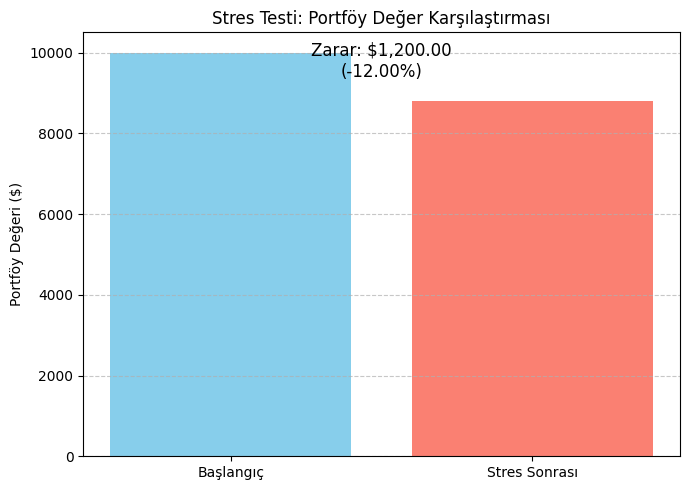

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for calculations

# Get the most recent closing prices for Apple and Samsung
# Use the 'Close' price since auto_adjust=True was used for AAPL and samsung_data
last_prices = {
    'Apple': AAPL['Close'].iloc[-1].item(), # Use .item() to get the scalar value
    'Samsung': samsung_data['Close'].iloc[-1].item() # Use .item() to get the scalar value
}

# Investment amounts
investments = {'Apple': 6000, 'Samsung': 4000}

# Calculate the initial portfolio value
original_total = sum(investments.values())

# Calculate the number of shares for each stock
shares = {
    'Apple': investments['Apple'] / last_prices['Apple'],
    'Samsung': investments['Samsung'] / last_prices['Samsung']
}

# Stress scenario: percentage decrease
shock = {'Apple': -0.10, 'Samsung': -0.15}

# Calculate the new prices under the stress scenario
new_prices = {
    ticker: last_prices[ticker] * (1 + shock[ticker])
    for ticker in shock.keys() # Iterate over the keys in shock
}

# Calculate the new investment value under the stress scenario
new_values = {
    ticker: shares[ticker] * new_prices[ticker]
    for ticker in shares.keys() # Iterate over the keys in shares
}

# Calculate the new total portfolio value
new_total = sum(new_values.values())

# Calculate the total loss and percentage loss
loss_amount = original_total - new_total
loss_percent = (loss_amount / original_total) * 100


# Bar grafiği için veriler
labels = ['Başlangıç', 'Stres Sonrası']
values = [original_total, new_total]

plt.figure(figsize=(7,5))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title("Stres Testi: Portföy Değer Karşılaştırması")
plt.ylabel("Portföy Değeri ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Kaybı görselleştir
plt.text(0.5, (original_total + new_total)/2,
         f'Zarar: ${loss_amount:,.2f}\n(-{loss_percent:.2f}%)',
         ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Linear Regression

Apple

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Veri Hazırlama (Özellik mühendisliği)

In [ ]:
# Kapanış fiyatlarına göre 1 gün sonraki fiyat tahmini
AAPL['Target'] = AAPL['Adj Close'].shift(-1)

# NaN olan son satırı at
AAPL.dropna(inplace=True)

# Özellik ve hedef değişkenleri ayır
X = AAPL[['Adj Close']]  # sadece bugünkü fiyat
y = AAPL['Target']       # yarınki fiyat


Eğitim ve Test Verisi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Modeli Eğit ve Tahmin Yap

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


 Performans Değerlendirmesi RMSE (Root Mean Squared Error)

In [ ]:
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Hatalı satır düzeltildi
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 1.9862
RMSE: 2.8664
R² Score: 0.7446


Gerçek vs. Tahmin Grafiği

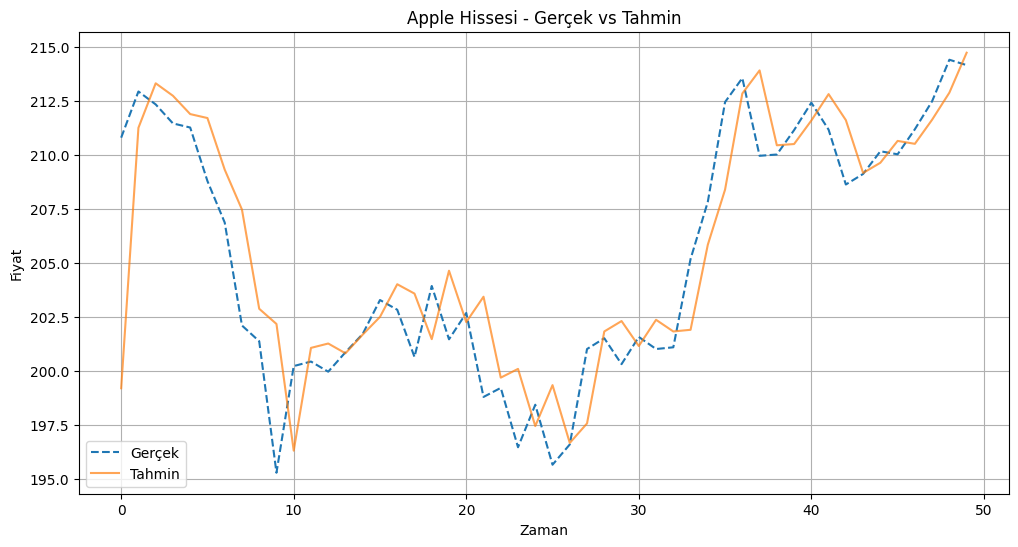

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek", linestyle='--')
plt.plot(y_pred, label="Tahmin", alpha=0.7)
plt.title("Apple Hissesi - Gerçek vs Tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.legend()
plt.grid()
plt.show()


Samsung

In [ ]:
# Kapanış fiyatlarına göre 1 gün sonraki fiyat tahmini
samsung_data['Target'] = samsung_data['Adj Close'].shift(-1)

# NaN olan son satırı at
samsung_data.dropna(inplace=True)

# Özellik ve hedef değişkenleri ayır
X = samsung_data[['Adj Close']]  # sadece bugünkü fiyat
y = samsung_data['Target']       # yarınki fiyat

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Hatalı satır düzeltildi
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 914.3076
RMSE: 1123.9684
R² Score: 0.8981


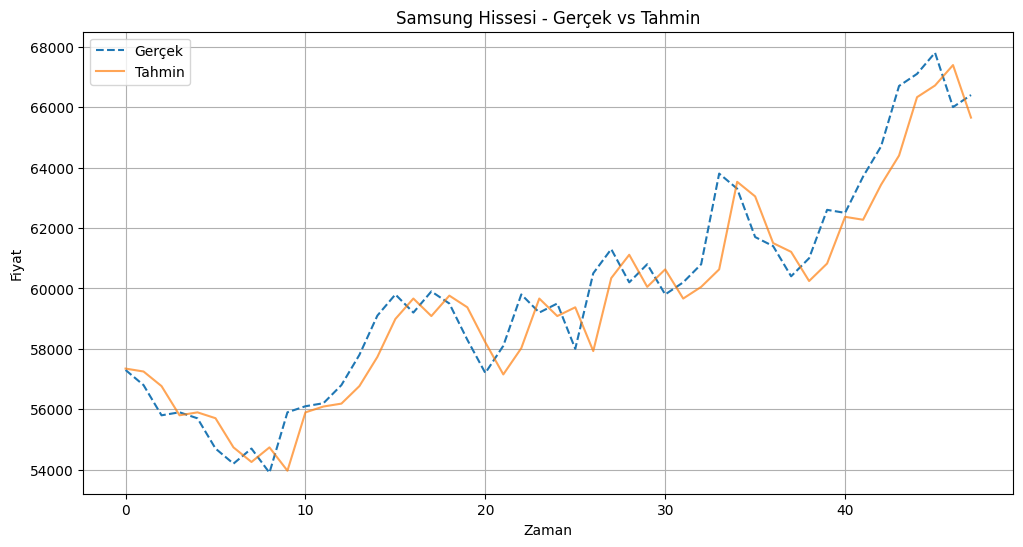

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek", linestyle='--')
plt.plot(y_pred, label="Tahmin", alpha=0.7)
plt.title("Samsung Hissesi - Gerçek vs Tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.legend()
plt.grid()
plt.show()

### 🔗 Kaynakça
- Hisse verileri Yahoo Finance API (yfinance) ve kaggle aracılığıyla alınmıştır.
- Python kütüphaneleri: pandas, matplotlib, seaborn, sklearn kullanılmıştır.
